In [1]:
import os, sys
import torch

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)  # One level above dir1


if dir1 not in sys.path: sys.path.append(dir0)

from src.config import PPOConfig, EmbeddingStrategy
from src.experiments import ExperimentSuite
from src.utils import ExperimentUtils


def plot_rewards_of_strategy_in_env(list_of_strategies, file_name):
    url = "saved_experiments" + "/" + file_name
    base_config_balance_5_agents = PPOConfig(
        scenario_name='balance', use_strategy_defaults=True, n_agents=5, n_iters=80, decentralized_execution=False
    )

    param_grid = {
        "strategy": list_of_strategies
    }
    my_device = torch.device("cpu")
    suite = ExperimentSuite(base_config=base_config_balance_5_agents, param_grid=param_grid, name="test_all", device=my_device)
    suite.run_all_confidence(k=10)

    suite_utils = ExperimentUtils(path=url, experiment_suite=suite)
    suite_utils.save_df_to_file()
    suite_utils.plot_experiment_suite_df()
    print(suite_utils.create_table_with_confidence())

2025-08-18 19:57:35,168 [torchrl][INFO] check_env_specs succeeded!
2025-08-18 19:57:35,414 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 43.94312286376953: 100%|██████████| 80/80 [01:33<00:00,  1.17s/it]  
2025-08-18 19:59:09,229 [torchrl][INFO] Training time: 38.56 seconds
2025-08-18 19:59:09,232 [torchrl][INFO] macs: 18.82 MMac  Params: 9.41 k
2025-08-18 19:59:10,002 [torchrl][INFO] check_env_specs succeeded!
2025-08-18 19:59:10,037 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 49.67107391357422: 100%|██████████| 80/80 [01:38<00:00,  1.23s/it]   
2025-08-18 20:00:48,224 [torchrl][INFO] Training time: 39.73 seconds
2025-08-18 20:00:48,227 [torchrl][INFO] macs: 18.82 MMac  Params: 9.41 k
2025-08-18 20:00:49,011 [torchrl][INFO] check_env_specs succeeded!
2025-08-18 20:00:49,045 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 38.389583587646484: 100%|██████████| 80/80 [01:49<00:00,  1.37s/it] 
2025-08-18 20:02:38,247 [torchrl][INFO] 

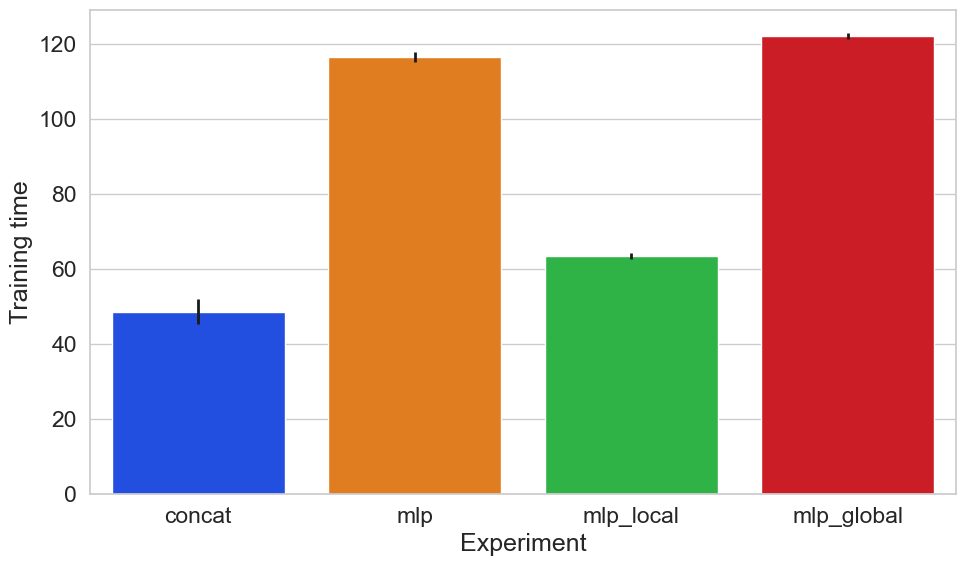

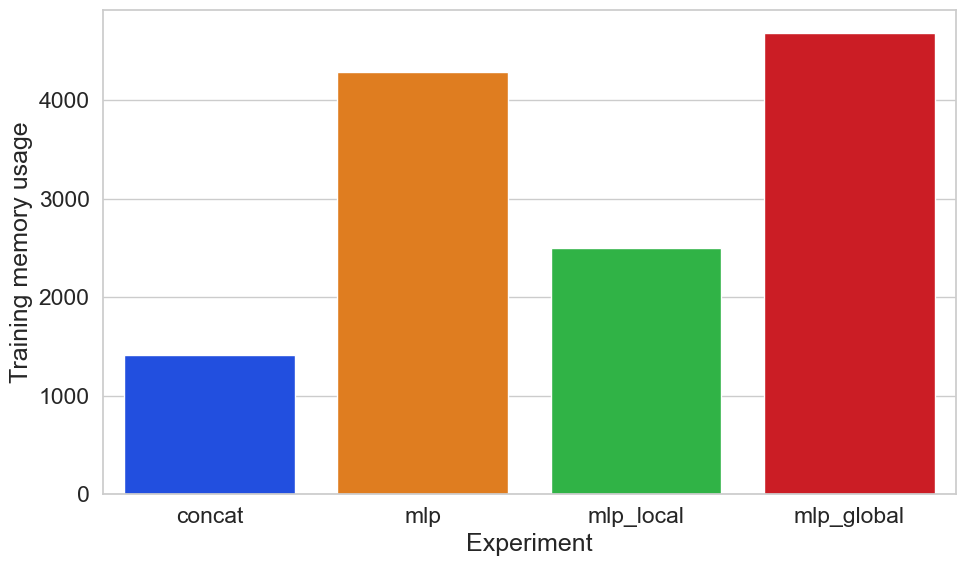

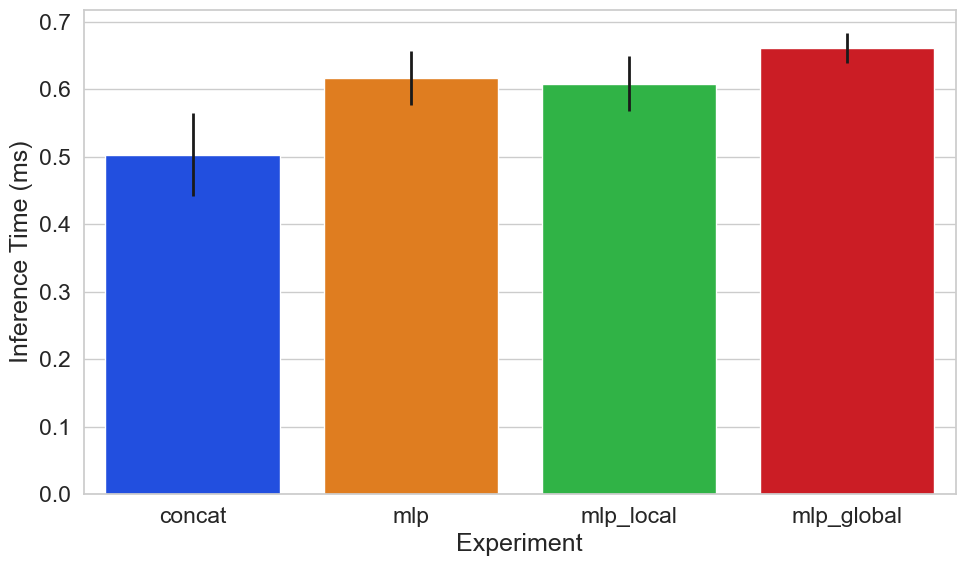

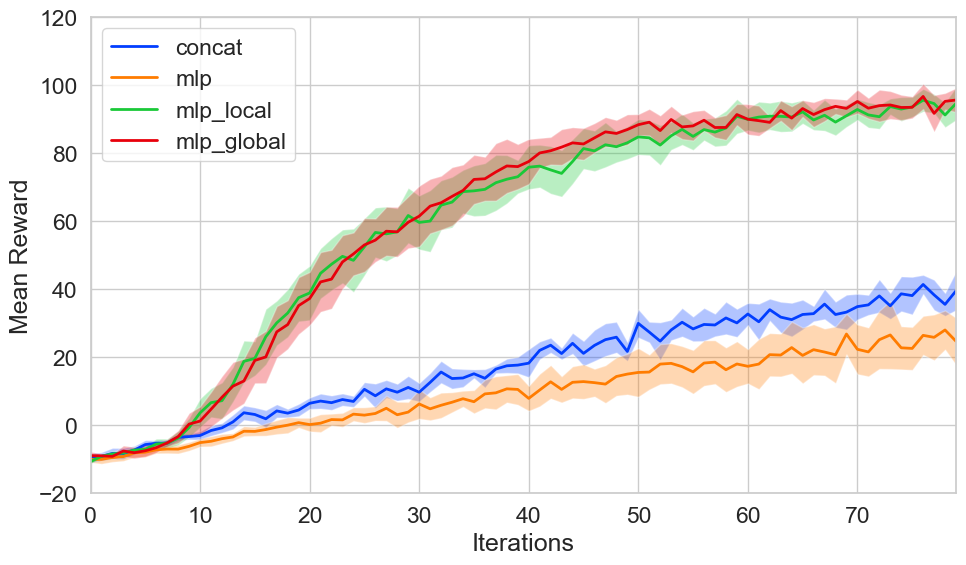

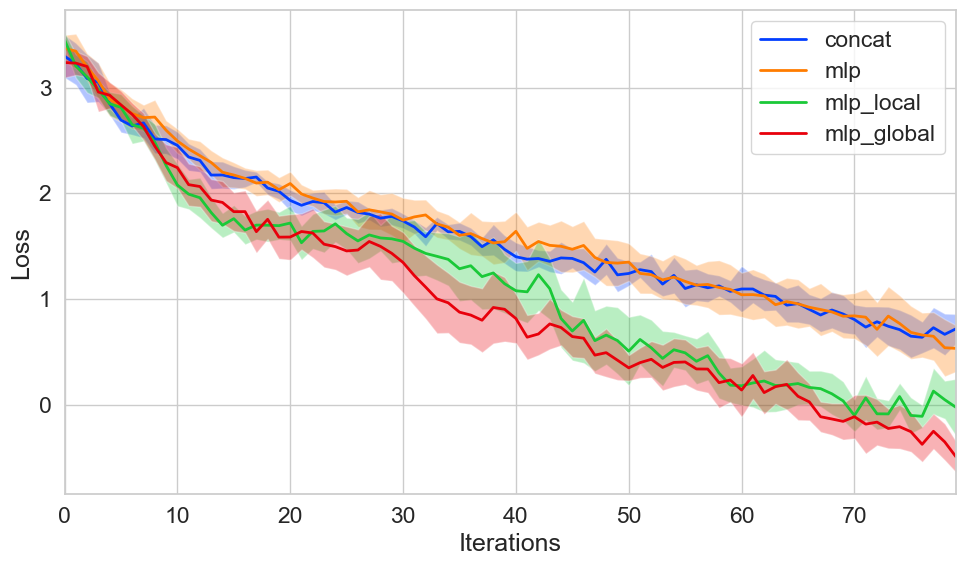

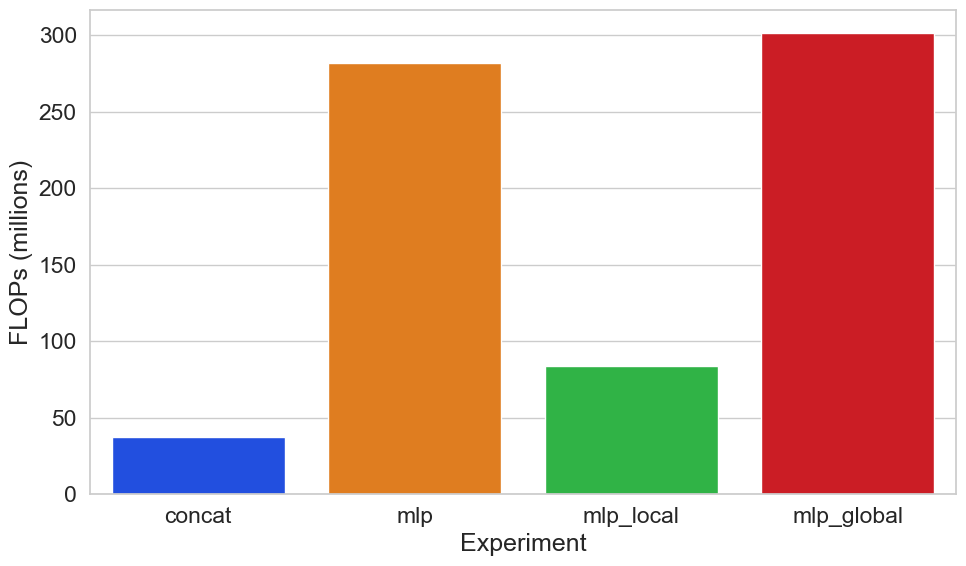

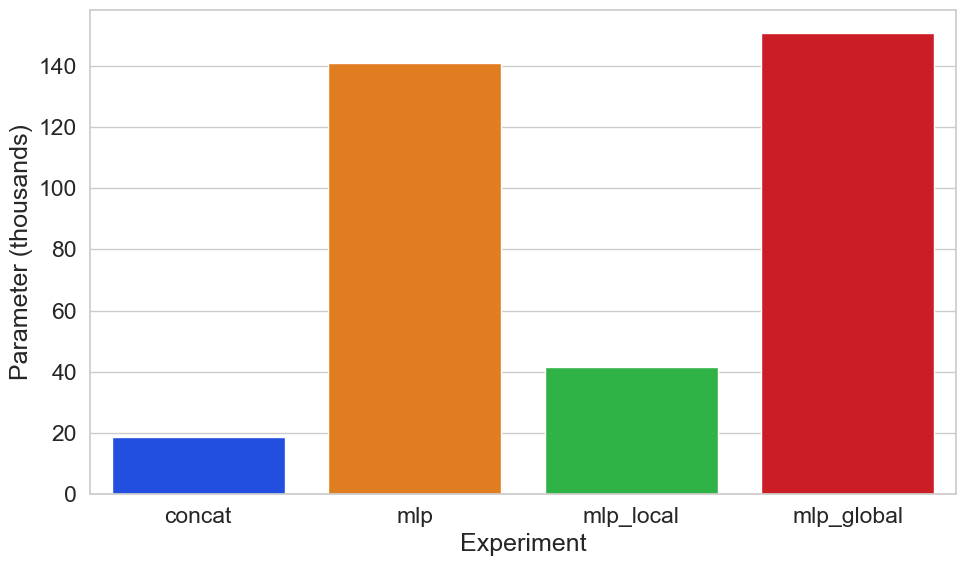

   Experiment  training_time training_memory_usage       inference_time  \
0      concat   48.70 ± 3.31    1414.83 ± 0.00e+00  5.03e-04 ± 6.08e-05   
1         mlp  116.58 ± 1.42    4284.67 ± 0.00e+00  6.16e-04 ± 4.00e-05   
2   mlp_local   63.60 ± 0.73    2500.24 ± 0.00e+00  6.08e-04 ± 4.09e-05   
3  mlp_global  122.16 ± 0.85    4684.30 ± 0.00e+00  6.61e-04 ± 2.21e-05   

   mean_rewards          loss              flops         parameters  
0  39.50 ± 5.63   0.72 ± 0.14   37.64 ± 0.00e+00   18.82 ± 0.00e+00  
1  24.68 ± 6.89   0.54 ± 0.22  281.60 ± 0.00e+00  140.80 ± 0.00e+00  
2  94.57 ± 4.81  -0.02 ± 0.27   83.46 ± 8.68e-15   41.72 ± 4.34e-15  
3  95.60 ± 3.52  -0.49 ± 0.15  301.26 ± 3.47e-14  150.62 ± 1.74e-14  


In [2]:
strategies = [
    EmbeddingStrategy.CONCAT,
    EmbeddingStrategy.MLP,
    EmbeddingStrategy.MLP_LOCAL,
    EmbeddingStrategy.MLP_GLOBAL
]

plot_rewards_of_strategy_in_env(strategies, file_name='5_balance_mlps_ctce.csv')

2025-08-18 21:48:39,329 [torchrl][INFO] check_env_specs succeeded!
2025-08-18 21:48:39,415 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 0:   0%|          | 0/80 [00:00<?, ?it/s]/opt/miniconda3/envs/ma_rl/lib/python3.9/site-packages/torch_geometric/utils/_scatter.py:79: UserWarning: There is a performance drop because we have not yet implemented the batching rule for aten::scatter_add_. Please file us an issue on GitHub so that we can prioritize its implementation. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/functorch/BatchedFallback.cpp:84.)
  count.scatter_add_(0, index, src.new_ones(src.size(dim)))
/opt/miniconda3/envs/ma_rl/lib/python3.9/site-packages/torch_geometric/utils/_scatter.py:83: UserWarning: There is a performance drop because we have not yet implemented the batching rule for aten::scatter_add_. Please file us an issue on GitHub so that we can prioritize its implementation. (Triggered internally at /Users/runner/wor

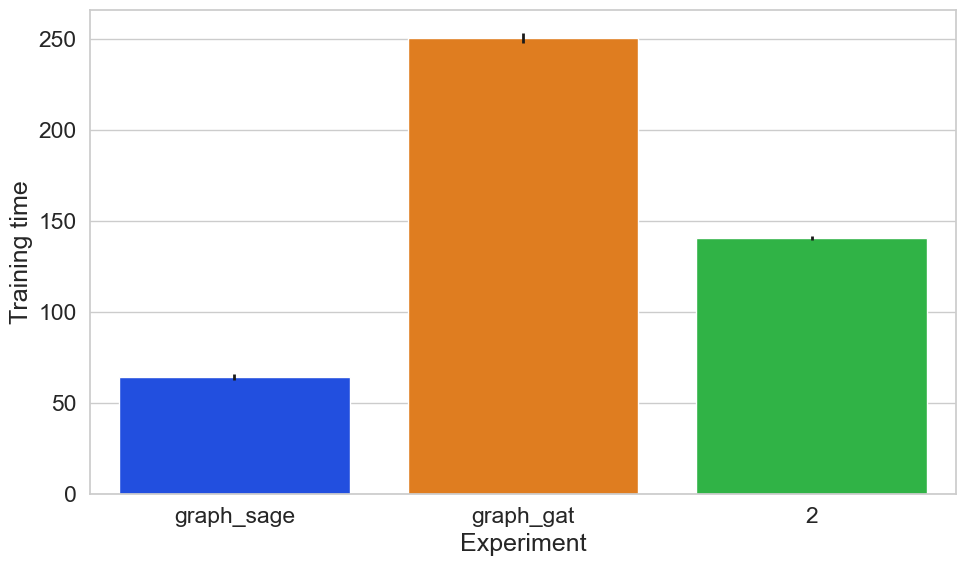

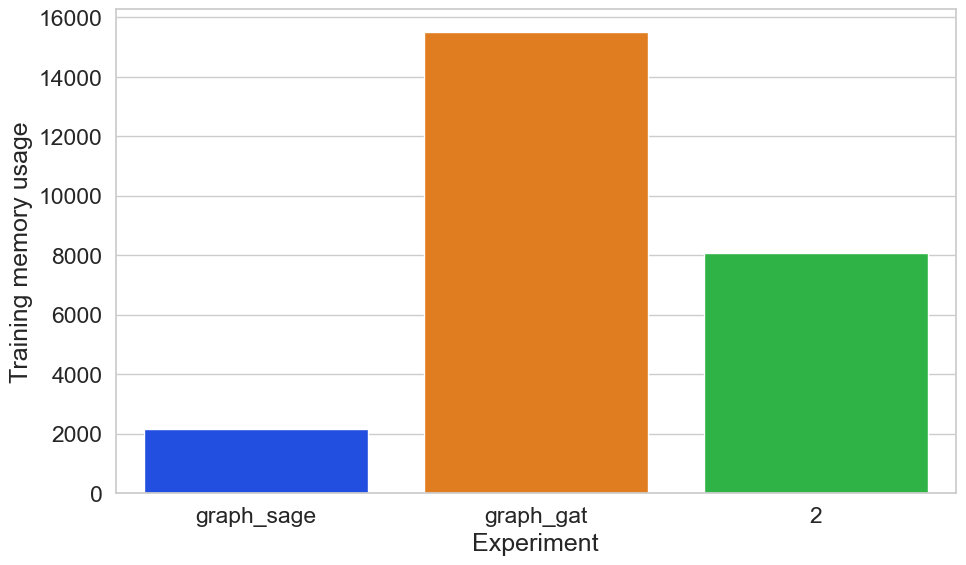

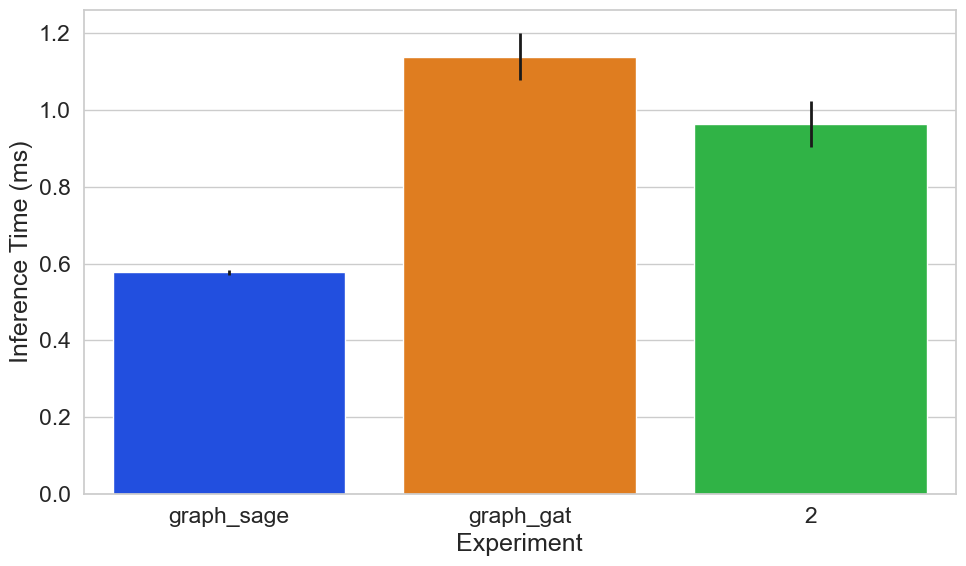

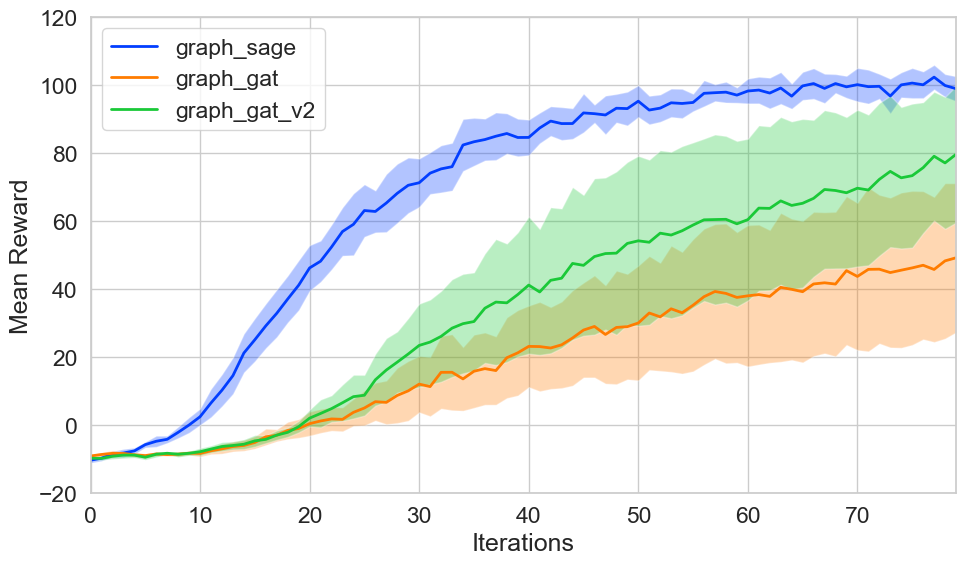

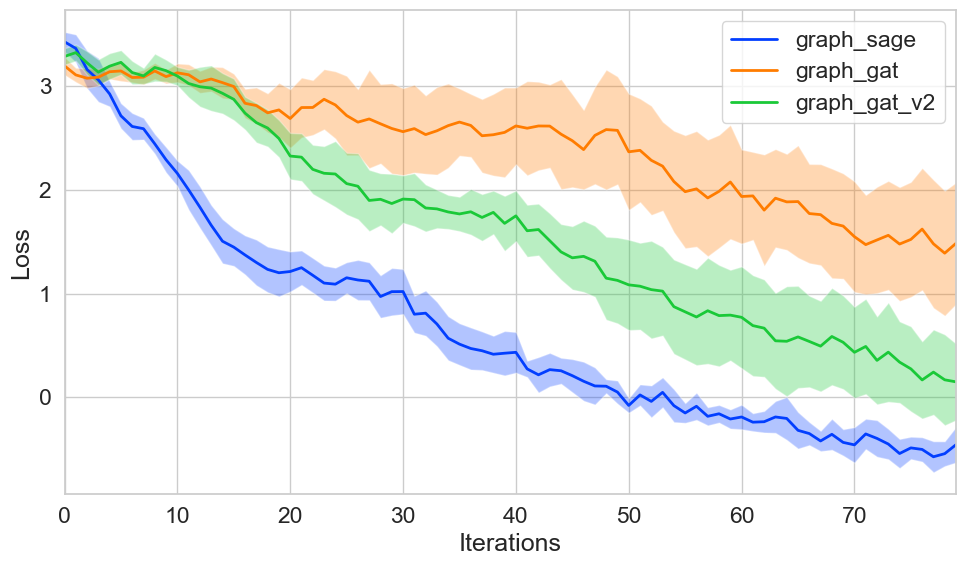

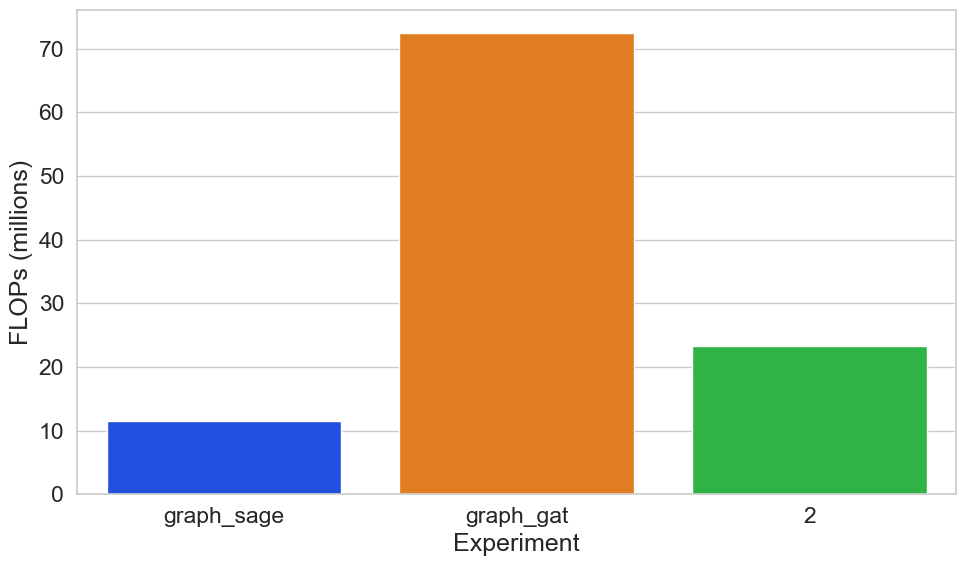

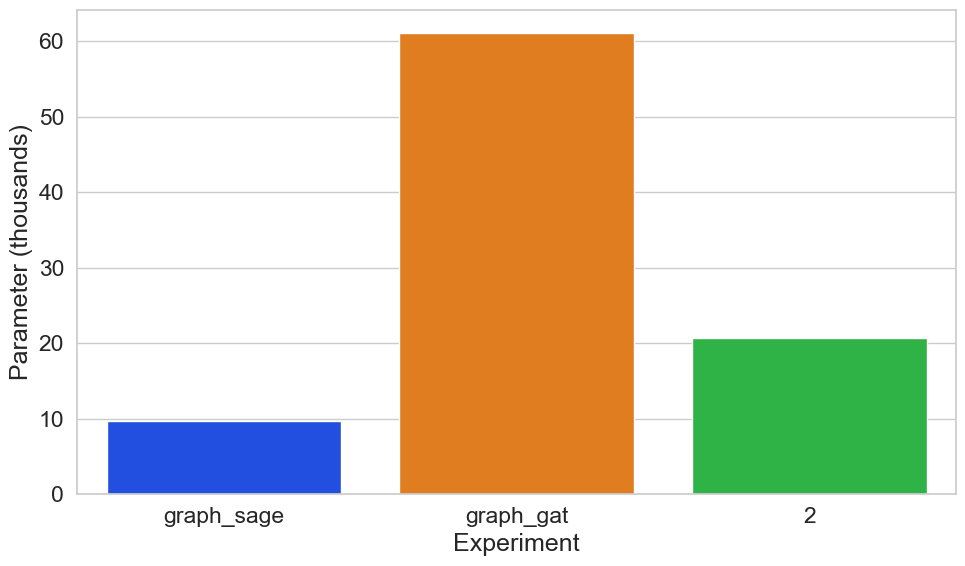

     Experiment  training_time training_memory_usage       inference_time  \
0    graph_sage   64.60 ± 1.66    2155.23 ± 0.00e+00  5.77e-04 ± 6.92e-06   
1     graph_gat  250.60 ± 2.69   15495.60 ± 0.00e+00  1.14e-03 ± 6.11e-05   
2  graph_gat_v2  140.80 ± 1.17    8089.68 ± 0.00e+00  9.63e-04 ± 6.05e-05   

    mean_rewards          loss             flops        parameters  
0   98.93 ± 3.63  -0.46 ± 0.17  11.52 ± 0.00e+00   9.66 ± 0.00e+00  
1  49.22 ± 21.91   1.48 ± 0.59  72.46 ± 8.68e-15  61.06 ± 8.68e-15  
2  79.62 ± 20.07   0.15 ± 0.37  23.24 ± 2.17e-15  20.74 ± 2.17e-15  


In [3]:
strategies = [
    EmbeddingStrategy.GRAPH_SAGE,
    EmbeddingStrategy.GRAPH_GAT,
    EmbeddingStrategy.GRAPH_GAT_v2
]

plot_rewards_of_strategy_in_env(strategies, file_name='5_balance_gnn_ctce.csv')

2025-08-18 23:48:50,258 [torchrl][INFO] check_env_specs succeeded!
2025-08-18 23:48:50,316 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 108.84856414794922: 100%|██████████| 80/80 [04:25<00:00,  3.32s/it]
2025-08-18 23:53:15,747 [torchrl][INFO] Training time: 181.65 seconds
2025-08-18 23:53:15,755 [torchrl][INFO] macs: 49.17 MMac  Params: 35.47 k
2025-08-18 23:53:17,030 [torchrl][INFO] check_env_specs succeeded!
2025-08-18 23:53:17,073 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 97.62911224365234: 100%|██████████| 80/80 [04:27<00:00,  3.34s/it]  
2025-08-18 23:57:44,668 [torchrl][INFO] Training time: 182.82 seconds
2025-08-18 23:57:44,676 [torchrl][INFO] macs: 49.17 MMac  Params: 35.47 k
2025-08-18 23:57:45,911 [torchrl][INFO] check_env_specs succeeded!
2025-08-18 23:57:45,954 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 99.95340728759766: 100%|██████████| 80/80 [04:29<00:00,  3.37s/it]  
2025-08-19 00:02:15,620 [torchrl][INFO

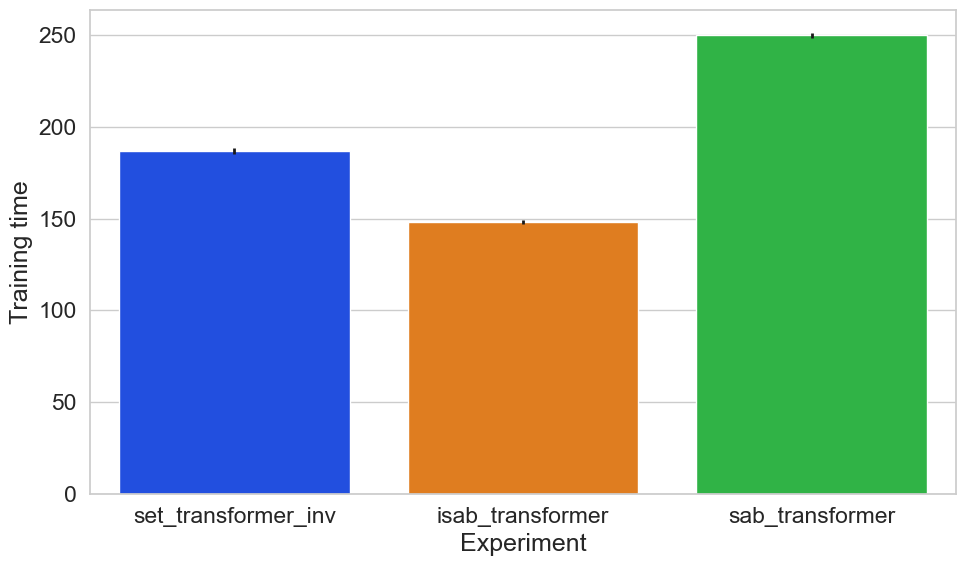

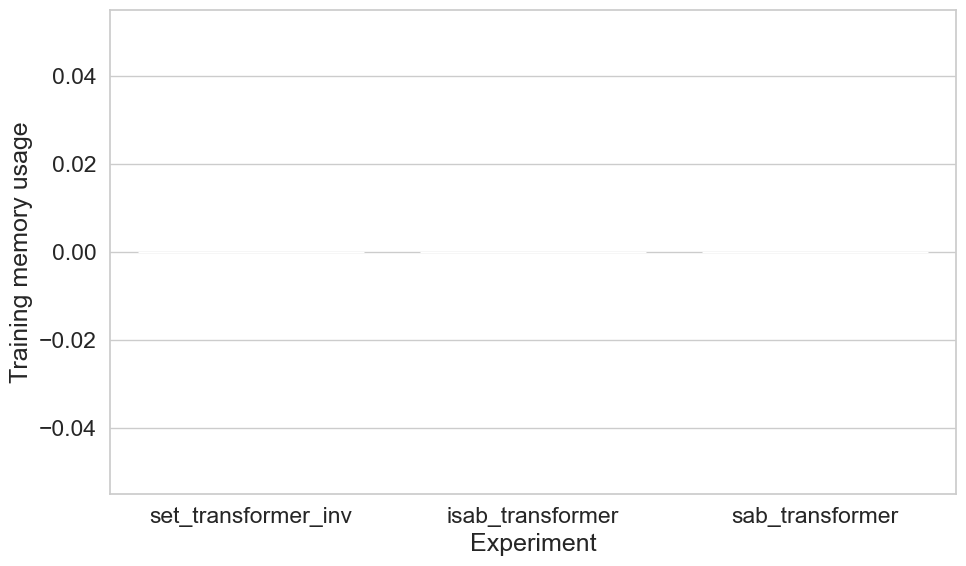

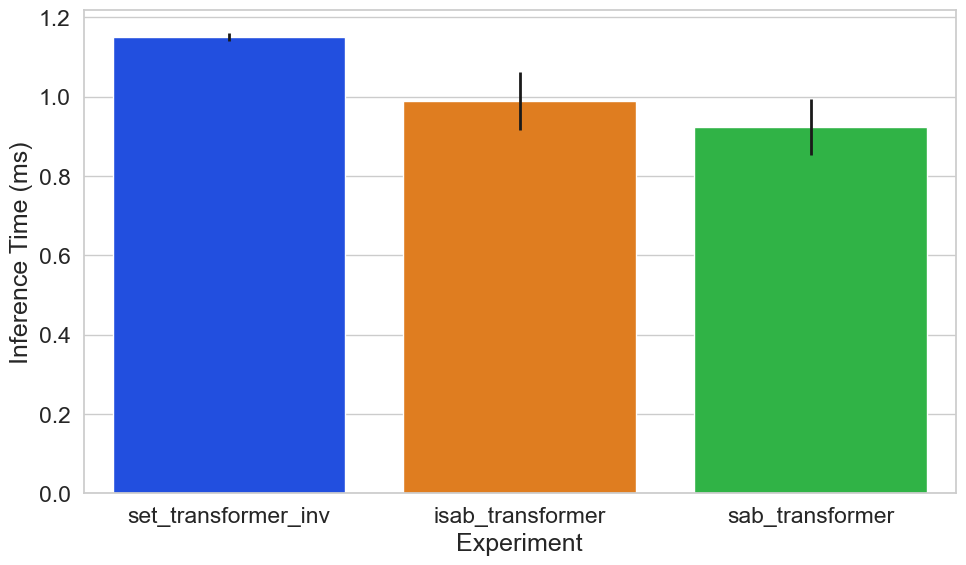

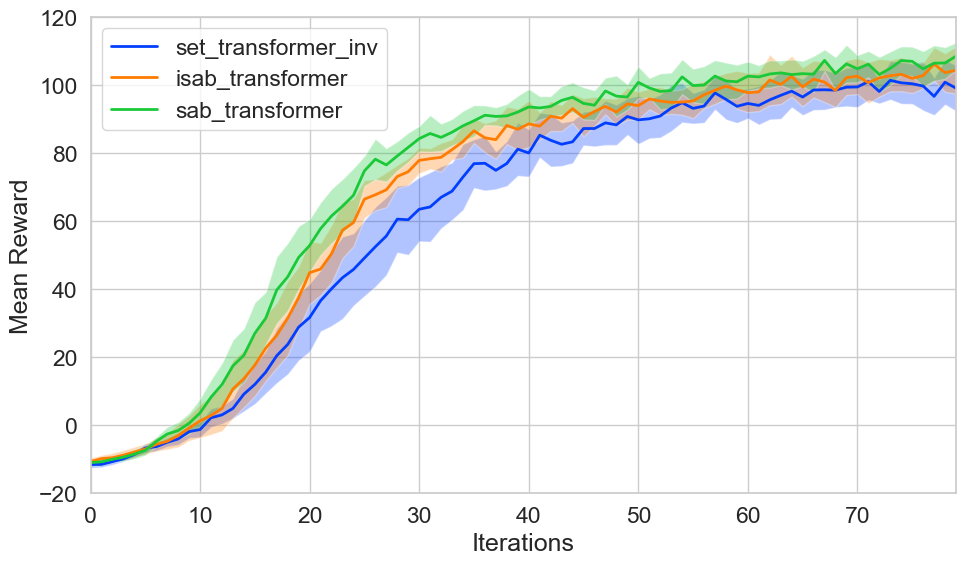

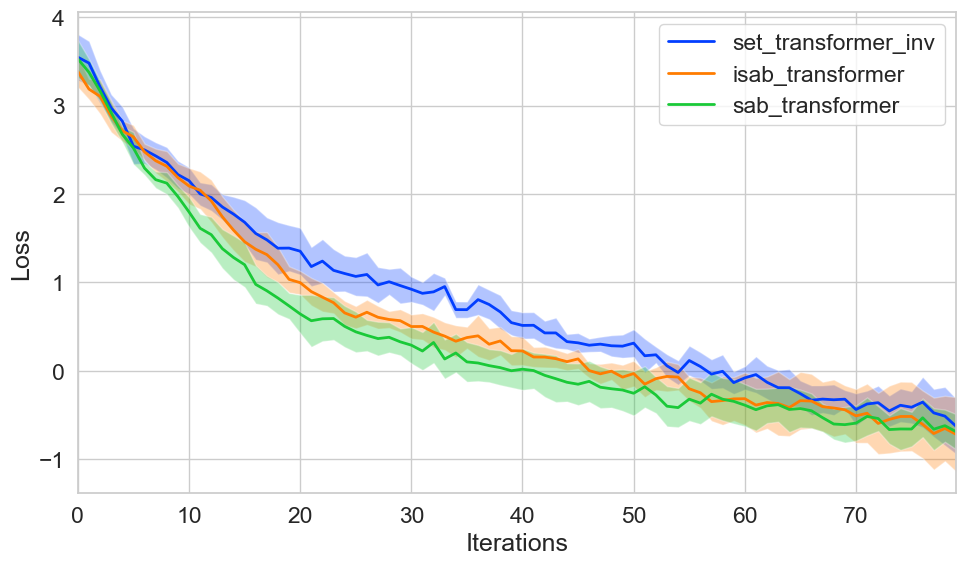

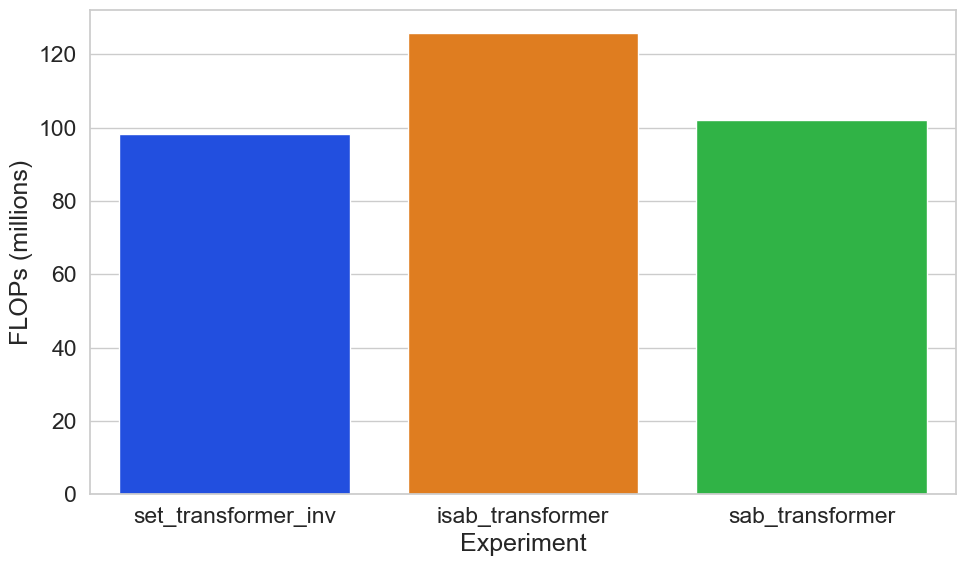

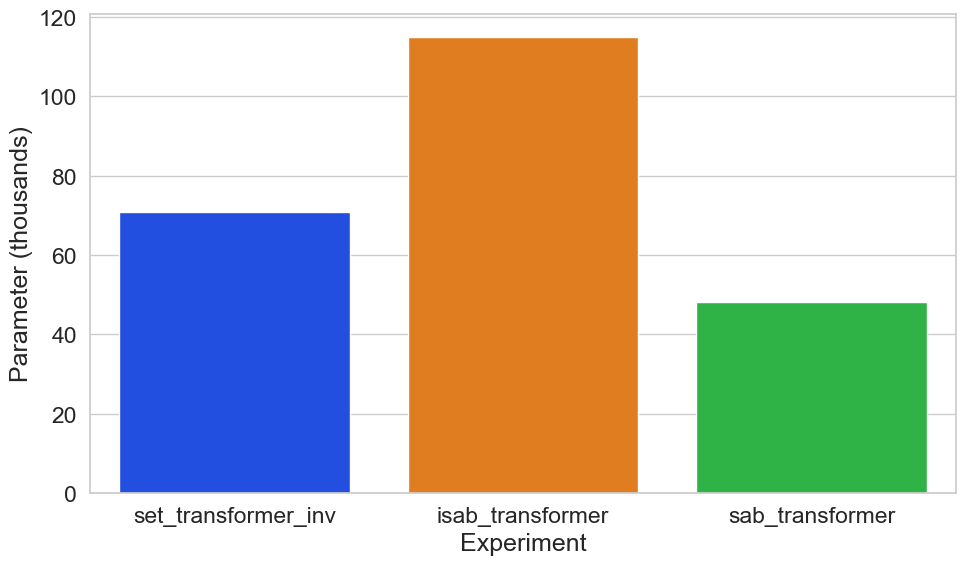

            Experiment  training_time training_memory_usage  \
0  set_transformer_inv  186.99 ± 1.64   0.00e+00 ± 0.00e+00   
1     isab_transformer  148.06 ± 1.07   0.00e+00 ± 0.00e+00   
2      sab_transformer  249.72 ± 1.31   0.00e+00 ± 0.00e+00   

        inference_time   mean_rewards          loss              flops  \
0  1.15e-03 ± 9.74e-06   99.08 ± 6.69  -0.63 ± 0.31   98.34 ± 0.00e+00   
1  9.88e-04 ± 7.29e-05  104.33 ± 6.88  -0.72 ± 0.42  125.80 ± 0.00e+00   
2  9.24e-04 ± 7.14e-05  108.48 ± 3.99  -0.69 ± 0.20  102.14 ± 0.00e+00   

          parameters  
0   70.94 ± 8.68e-15  
1  115.08 ± 0.00e+00  
2   48.26 ± 0.00e+00  


In [4]:
strategies = [
    EmbeddingStrategy.SET_TRANSFORMER_INV,
    EmbeddingStrategy.ISAB_TRANSFORMER,
    EmbeddingStrategy.SAB_TRANSFORMER
]

plot_rewards_of_strategy_in_env(strategies, file_name='5_balance_set_ctce.csv')